In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from definitions import data_source_path, treatment_countries, fig_size, \
show_plots, save_figs, show_output, target_var, country_col, date_col, incl_countries, incl_years
from util_general import read_data, get_impl_date, get_trans, get_timescale, get_data_path, get_fig_path, get_table_path
from plot_functions import plot_corr, plot_series

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler 

In [5]:
treatment_country = 'france'
var_name = 'pop'
fig_size = (10,4)

In [6]:
pop_q_raw = read_data(source_path=get_data_path(timeframe='q'), file_name=f'pop_q')
pop_q = pop_q_raw.copy()

pop_q = pop_q[pop_q[country_col]==treatment_country].set_index(date_col)[var_name]
pop_q.index = pd.to_datetime(pop_q.index)
pop_q

date
2000-01-01    60738000.0
2000-04-01    60847200.0
2000-07-01    60957300.0
2000-10-01    61068100.0
2001-01-01    61179600.0
                 ...    
2018-10-01    67571900.0
2019-01-01    67650700.0
2019-04-01    67724300.0
2019-07-01    67792800.0
2019-10-01    67856300.0
Name: pop, Length: 80, dtype: float64

In [7]:
pop_m_raw = read_data(source_path=get_data_path(timeframe='m'), file_name=f'pop_m')
pop_m = pop_m_raw.copy()

pop_m = pop_m[pop_m[country_col]==treatment_country].set_index(date_col)[var_name]
pop_m.index = pd.to_datetime(pop_m.index)
pop_m

date
2000-01-01    6.073800e+07
2000-02-01    6.077440e+07
2000-03-01    6.081080e+07
2000-04-01    6.084720e+07
2000-05-01    6.088390e+07
                  ...     
2019-06-01    6.776997e+07
2019-07-01    6.779280e+07
2019-08-01    6.781397e+07
2019-09-01    6.783513e+07
2019-10-01    6.785630e+07
Name: pop, Length: 238, dtype: float64

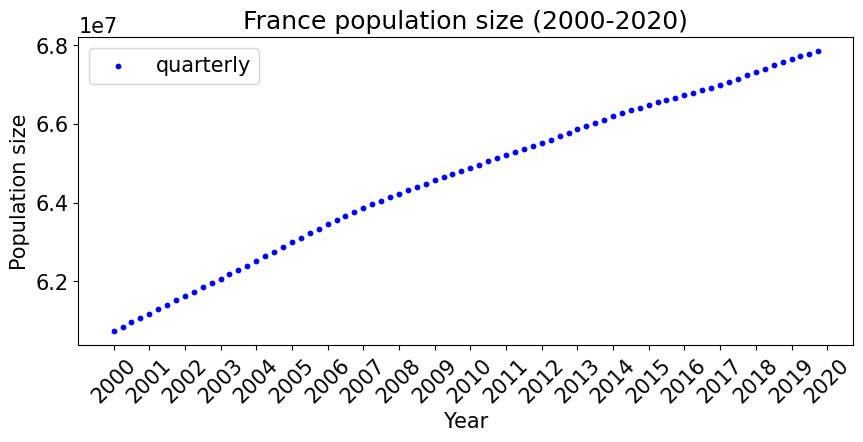

In [10]:
series = pop_q

fig, ax = plt.subplots(figsize=fig_size)
ax.scatter(x=series.index, y=series, s=10, c='blue', label='quarterly')

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title(f'France population size (2000-2020)')
ax.set_xlabel('Year')
ax.set_ylabel(f'Population size')
ax.legend()

plt.savefig('france_q_pop_all', bbox_inches='tight')

plt.show()

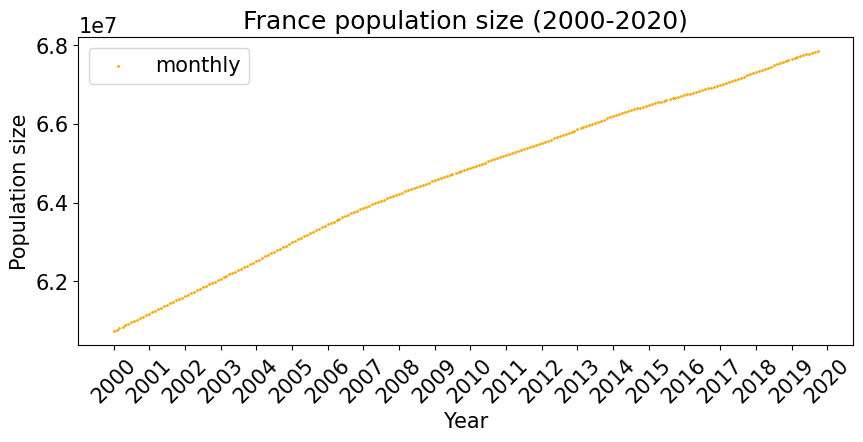

In [11]:
series = pop_m

fig, ax = plt.subplots(figsize=fig_size)
ax.scatter(x=series.index, y=series, s=1, c='orange', label='monthly')

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title(f'France population size (2000-2020)')
ax.set_xlabel('Year')
ax.set_ylabel(f'Population size')
ax.legend()

plt.savefig('france_m_pop_all', bbox_inches='tight')

plt.show()

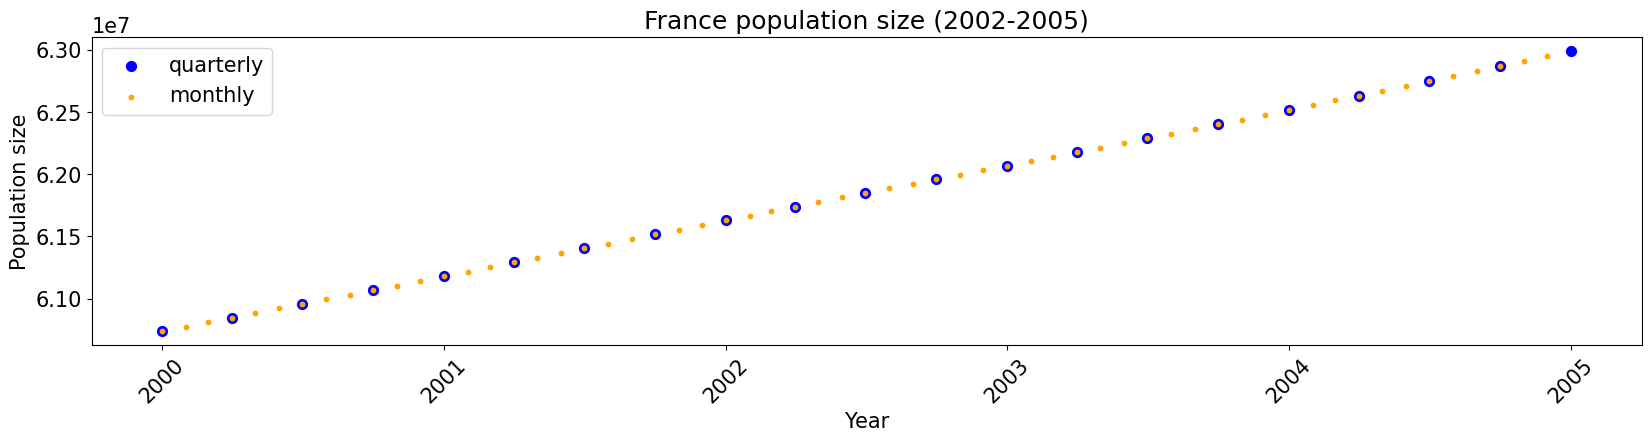

In [12]:
fig, ax = plt.subplots(figsize=(20, 4))

ax.scatter(x=pop_q.index[:21], y=pop_q[:21], s=50, marker='o', c='blue', label='quarterly')
ax.scatter(x=pop_m.index[:60], y=pop_m[:60], s=10, c='orange', label='monthly')

ax.xaxis.set_major_locator(mdates.YearLocator())
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set_title(f'France population size (2002-2005)')
ax.set_xlabel('Year')
ax.set_ylabel(f'Population size')
ax.legend()

plt.savefig('france_m_q_pop_2005', bbox_inches='tight')

plt.show()